# Make heatmaps to visualize perception data

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [2]:
df = pd.read_csv("data/eng_r.csv")
df.head()

,subjID,partID,list,block,trial,file1,filedur,loadtime,status,response,...,filename,formant,spectilt,duration,formant_center,spectilt_center,duration_center,lang_profile,pc1,pc2
0,263d1df1212401,acj047,2,0,0,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,429,320,OK,PONdiss,...,F4_dur3,4.0,3.0,3.0,1.0,0.0,0.0,mono,NaN,NaN
1,263d1df1212401,acj047,2,0,1,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,407,255,OK,PONdiss,...,F4_dur4,4.0,3.0,4.0,1.0,0.0,1.0,mono,NaN,NaN
2,263d1df1212401,acj047,2,0,2,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,411,275,OK,PONdiss,...,st4_dur4,3.0,4.0,4.0,0.0,1.0,1.0,mono,NaN,NaN
3,263d1df1212401,acj047,2,0,3,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,408,300,OK,PONdiss,...,F2_dur5,2.0,3.0,5.0,-1.0,0.0,2.0,mono,NaN,NaN
4,263d1df1212401,acj047,2,0,5,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,434,305,OK,ponDISS,...,st4_dur3,3.0,4.0,3.0,0.0,1.0,0.0,mono,NaN,NaN


In [3]:
df['oxytone'] = np.where(df['response_binary']=="ult", 1, 0)
df.head(2)

,subjID,partID,list,block,trial,file1,filedur,loadtime,status,response,...,formant,spectilt,duration,formant_center,spectilt_center,duration_center,lang_profile,pc1,pc2,oxytone
0,263d1df1212401,acj047,2,0,0,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,429,320,OK,PONdiss,...,4.0,3.0,3.0,1.0,0.0,0.0,mono,NaN,NaN,0
1,263d1df1212401,acj047,2,0,1,https://d3uxfe7dw0hhy7.cloudfront.net/annie-he...,407,255,OK,PONdiss,...,4.0,3.0,4.0,1.0,0.0,1.0,mono,NaN,NaN,0


In [4]:
# for both: break into two by dominance bins
df_l1 = df[df['lang_profile']=="l1_eng"].copy()
df_l3 = df[df['lang_profile']=="l3_eng"].copy()
df_mono = df[df['lang_profile']=="mono"].copy()

Create a column with sum of ponDISS responses

In [5]:
# by dominance
summed_l1 = df_l1.groupby(['formant_center',
                                       'duration_center',
                                       'spectilt_center'])['oxytone'].agg(['sum', 'count']).reset_index()
summed_l3 = df_l3.groupby(['formant_center',
                             'duration_center',
                             'spectilt_center'])['oxytone'].agg(['sum', 'count']).reset_index()
summed_mono = df_mono.groupby(['formant_center',
                             'duration_center',
                             'spectilt_center'])['oxytone'].agg(['sum', 'count']).reset_index()
summed_l1.head()

,formant_center,duration_center,spectilt_center,sum,count
0,-2.0,-2.0,0.0,6,73
1,-2.0,-1.0,0.0,7,75
2,-2.0,0.0,-2.0,16,74
3,-2.0,0.0,-1.0,15,74
4,-2.0,0.0,0.0,33,147


In [6]:
# by dominance
summed_l1['ultimate_proportion'] = summed_l1['sum']/summed_l1['count']
summed_l3['ultimate_proportion'] = summed_l3['sum']/summed_l3['count']
summed_mono['ultimate_proportion'] = summed_mono['sum']/summed_mono['count']
summed_l1.head()

,formant_center,duration_center,spectilt_center,sum,count,ultimate_proportion
0,-2.0,-2.0,0.0,6,73,0.082192
1,-2.0,-1.0,0.0,7,75,0.093333
2,-2.0,0.0,-2.0,16,74,0.216216
3,-2.0,0.0,-1.0,15,74,0.202703
4,-2.0,0.0,0.0,33,147,0.224490


Break into pivot tables for each pair of acoustic measurements

In [7]:
fdur_l1 = pd.pivot_table(summed_l1,
                    index='formant_center',
                    values='ultimate_proportion',
                    columns='duration_center')

stdur_l1 = pd.pivot_table(summed_l1,
                    index='spectilt_center',
                    values='ultimate_proportion',
                    columns='duration_center')

fst_l1 = pd.pivot_table(summed_l1,
                    index='formant_center',
                    values='ultimate_proportion',
                    columns='spectilt_center')

fdur_l3 = pd.pivot_table(summed_l3,
                    index='formant_center',
                    values='ultimate_proportion',
                    columns='duration_center')

stdur_l3 = pd.pivot_table(summed_l3,
                    index='spectilt_center',
                    values='ultimate_proportion',
                    columns='duration_center')

fst_l3 = pd.pivot_table(summed_l3,
                    index='formant_center',
                    values='ultimate_proportion',
                    columns='spectilt_center')

fdur_mono = pd.pivot_table(summed_mono,
                    index='formant_center',
                    values='ultimate_proportion',
                    columns='duration_center')

stdur_mono = pd.pivot_table(summed_mono,
                    index='spectilt_center',
                    values='ultimate_proportion',
                    columns='duration_center')

fst_mono = pd.pivot_table(summed_mono,
                    index='formant_center',
                    values='ultimate_proportion',
                    columns='spectilt_center')

In [8]:
tex_fonts_together = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "font.size": 14,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
}

Change save destination based on language.

<ipython-input-12-5d5c128ee37e>:5: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax0.get_shared_y_axes().join(ax1, ax2)


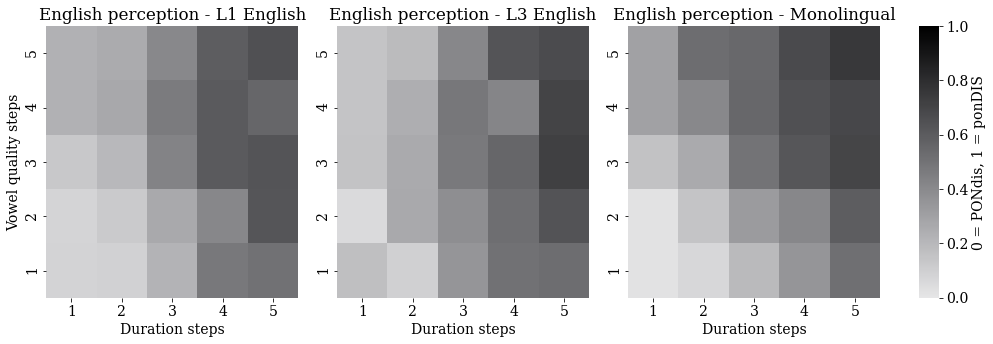

In [12]:
# remove ax2 for not English mono
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
fig, (ax0, ax1, ax2, axcb) = plt.subplots(1,4, sharey = False, sharex = False, figsize=(16,5),
                                   gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax0.get_shared_y_axes().join(ax1, ax2)
plt.rcParams.update(tex_fonts_together)
sns.heatmap(ax = ax0, data = fdur_l1, cmap=cmap, vmin=0, vmax=1,
            cbar = False,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
# cbar = axes[0].collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
ax0.invert_yaxis()
ax0.set_title('English perception - L1 English')
ax0.set_xlabel('Duration steps')
ax0.set_ylabel('Vowel quality steps')

sns.heatmap(ax = ax1, data = fdur_l3, cmap=cmap, vmin=0, vmax=1,
            cbar = False,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
# cbar = axes[0].collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
ax1.invert_yaxis()
ax1.set_title('English perception - L3 English')
ax1.set_xlabel('Duration steps')
ax1.set_ylabel('')

sns.heatmap(ax = ax2, data = fdur_mono, cmap=cmap, vmin=0, vmax=1, 
            cbar_ax = axcb,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
cbar = ax2.collections[0].colorbar
cbar.ax.set_ylabel('0 = PONdis, 1 = ponDIS')
ax2.invert_yaxis()
ax2.set_title('English perception - Monolingual')
ax2.set_xlabel('Duration steps')
ax2.set_ylabel('');

plt.savefig('figures/eng_f_dur_all.jpg', format='jpg', dpi=800)

In [160]:
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# fig, ax = plt.subplots(figsize=(7,5))
# plt.rcParams.update(tex_fonts)
# ax = sns.heatmap(fdur_l1, cmap=cmap, vmin=0, vmax=1, 
#                  xticklabels = [1,2,3,4,5],
#                  yticklabels = [1,2,3,4,5])
# cbar = ax.collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
# ax.invert_yaxis()
# ax.set_title('English perception by L1 English listeners')
# ax.set_xlabel('Duration steps')
# ax.set_ylabel('Vowel quality steps');
# plt.savefig('figures/eng_f_dur_l1.jpg', format='jpg', dpi=800)

In [161]:
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# fig, ax = plt.subplots(figsize=(7,5))
# plt.rcParams.update(tex_fonts)
# ax = sns.heatmap(fdur_l3, cmap=cmap, vmin=0, vmax=1, 
#                  xticklabels = [1,2,3,4,5],
#                  yticklabels = [1,2,3,4,5])
# cbar = ax.collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
# ax.invert_yaxis()
# ax.set_xlabel('Duration steps')
# ax.set_title('English perception by L3 English listeners')
# ax.set_ylabel('Vowel quality steps');
# plt.savefig('figures/eng_f_dur_l3.jpg', format='jpg', dpi=800)

<ipython-input-14-ce04a9a4455e>:4: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax0.get_shared_y_axes().join(ax1,ax2)


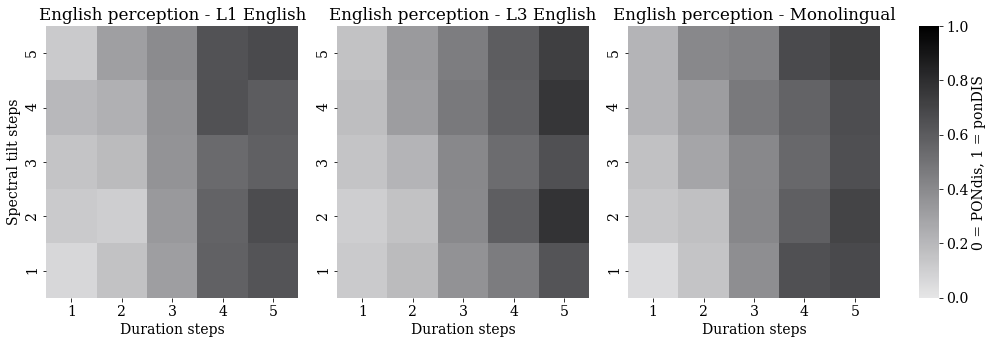

In [14]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
fig, (ax0, ax1, ax2, axcb) = plt.subplots(1,4, sharey = False, sharex = False, figsize=(16,5),
                                   gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax0.get_shared_y_axes().join(ax1,ax2)
plt.rcParams.update(tex_fonts_together)
sns.heatmap(ax = ax0, data = stdur_l1, cmap=cmap, vmin=0, vmax=1,
            cbar = False,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
# cbar = axes[0].collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
ax0.invert_yaxis()
ax0.set_title('English perception - L1 English')
ax0.set_xlabel('Duration steps')
ax0.set_ylabel('Spectral tilt steps')

sns.heatmap(ax = ax1, data = stdur_l3, cmap=cmap, vmin=0, vmax=1,
            cbar = False,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
# cbar = axes[0].collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
ax1.invert_yaxis()
ax1.set_title('English perception - L3 English')
ax1.set_xlabel('Duration steps')
ax1.set_ylabel('')

sns.heatmap(ax = ax2, data = stdur_mono, cmap=cmap, vmin=0, vmax=1, 
            cbar_ax = axcb,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
cbar = ax2.collections[0].colorbar
cbar.ax.set_ylabel('0 = PONdis, 1 = ponDIS')
ax2.invert_yaxis()
ax2.set_title('English perception - Monolingual')
ax2.set_xlabel('Duration steps')
ax2.set_ylabel('');

plt.savefig('figures/eng_st_dur_all.jpg', format='jpg', dpi=800)

In [146]:
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# fig, ax = plt.subplots(figsize=(7,5))
# ax = sns.heatmap(stdur_l1, cmap=cmap, vmin=0, vmax=1, 
#                  xticklabels = [1,2,3,4,5],
#                  yticklabels = [1,2,3,4,5])
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize = 13)
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS', size=18)
# ax.invert_yaxis()
# ax.set_xlabel('Duration', fontsize = 20)
# ax.set_ylabel('Spectral tilt', fontsize = 20);
# plt.savefig('figures/eng_st_dur_l1.jpg', format='jpg', dpi=800)

In [147]:
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# fig, ax = plt.subplots(figsize=(7,5))
# ax = sns.heatmap(stdur_l3, cmap=cmap, vmin=0, vmax=1, 
#                  xticklabels = [1,2,3,4,5],
#                  yticklabels = [1,2,3,4,5])
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize = 13)
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS', size=18)
# ax.invert_yaxis()
# ax.set_xlabel('Duration', fontsize = 20)
# ax.set_ylabel('Spectral tilt', fontsize = 20);
# plt.savefig('figures/eng_st_dur_l3.jpg', format='jpg', dpi=800)

<ipython-input-15-070644b3d7f6>:4: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax0.get_shared_y_axes().join(ax1,ax2)


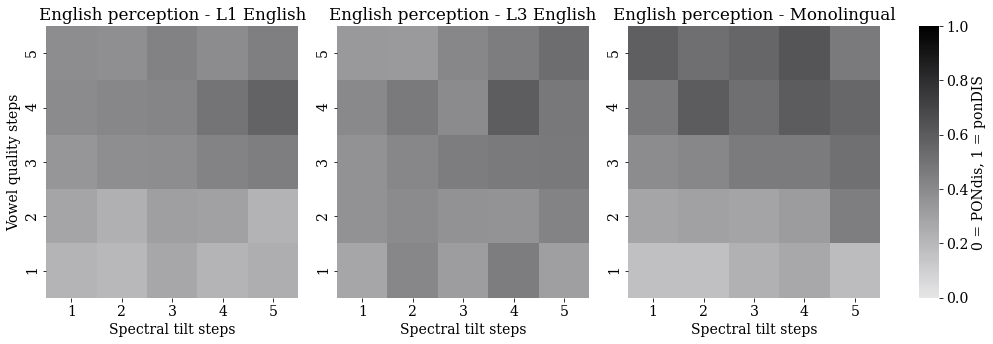

In [15]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
fig, (ax0, ax1, ax2, axcb) = plt.subplots(1,4, sharey = False, sharex = False, figsize=(16,5),
                                   gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax0.get_shared_y_axes().join(ax1,ax2)
plt.rcParams.update(tex_fonts_together)
sns.heatmap(ax = ax0, data = fst_l1, cmap=cmap, vmin=0, vmax=1,
            cbar = False,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
# cbar = axes[0].collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
ax0.invert_yaxis()
ax0.set_title('English perception - L1 English')
ax0.set_xlabel('Spectral tilt steps')
ax0.set_ylabel('Vowel quality steps')

sns.heatmap(ax = ax1, data = fst_l3, cmap=cmap, vmin=0, vmax=1,
            cbar = False,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
# cbar = axes[0].collections[0].colorbar
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS')
ax1.invert_yaxis()
ax1.set_title('English perception - L3 English')
ax1.set_xlabel('Spectral tilt steps')
ax1.set_ylabel('')

sns.heatmap(ax = ax2, data = fst_mono, cmap=cmap, vmin=0, vmax=1, 
            cbar_ax = axcb,
                 xticklabels = [1,2,3,4,5],
                 yticklabels = [1,2,3,4,5])
cbar = ax2.collections[0].colorbar
cbar.ax.set_ylabel('0 = PONdis, 1 = ponDIS')
ax2.invert_yaxis()
ax2.set_title('English perception - Monolingual')
ax2.set_xlabel('Spectral tilt steps')
ax2.set_ylabel('');

plt.savefig('figures/eng_f_st_all.jpg', format='jpg', dpi=800)

In [149]:
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# fig, ax = plt.subplots(figsize=(7,5))
# ax = sns.heatmap(fst_l1, cmap=cmap, vmin=0, vmax=1, 
#                  xticklabels = [1,2,3,4,5],
#                  yticklabels = [1,2,3,4,5])
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize = 13)
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS', size=18)
# ax.invert_yaxis()
# ax.set_xlabel('Spectral tilt', fontsize = 20)
# ax.set_ylabel('Vowel quality', fontsize = 20);
# plt.savefig('figures/eng_f_st_l1.jpg', format='jpg', dpi=800)

In [150]:
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# fig, ax = plt.subplots(figsize=(7,5))
# ax = sns.heatmap(fst_l3, cmap=cmap, vmin=0, vmax=1, 
#                  xticklabels = [1,2,3,4,5],
#                  yticklabels = [1,2,3,4,5])
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize = 13)
# cbar.ax.set_ylabel('0 = PONdis, 1 = ponDÍS', size=18)
# ax.invert_yaxis()
# ax.set_xlabel('Spectral tilt', fontsize = 20)
# ax.set_ylabel('Vowel quality', fontsize = 20);
# plt.savefig('figures/eng_f_st_l3.jpg', format='jpg', dpi=800)